<a href="https://colab.research.google.com/github/appy09/regression/blob/main/charges_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values

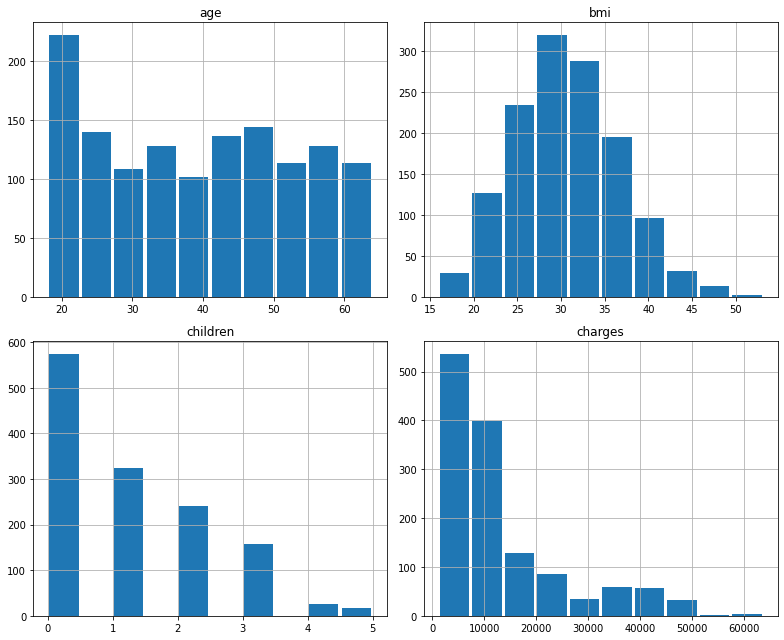

In [4]:

df.hist(rwidth=0.9,figsize=(11,9))
plt.tight_layout() 

Conclusion- predicted variable 'charges' is not normally distributed

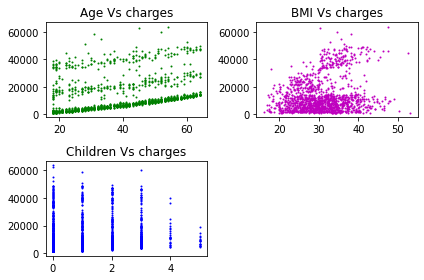

In [5]:
#continous values vs 'charges'
plt.subplot(2,2,1)
plt.title("Age Vs charges")
plt.scatter(df['age'],df['charges'],s=1,c='g')

plt.subplot(2,2,2)
plt.title("BMI Vs charges")
plt.scatter(df['bmi'],df['charges'],s=1,c='m')

plt.subplot(2,2,3)
plt.title("Children Vs charges")
plt.scatter(df['children'],df['charges'],s=1,c='b')

plt.tight_layout()

In [6]:
#linearity using correlation coefficient matrix using corr()
correlation=df[['age','bmi','children','charges']].corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


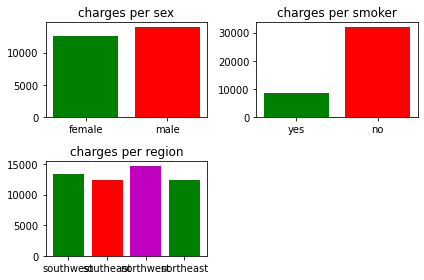

In [7]:
#plot categorical features Vs charges
#create 2x2 subplot
clrs=['g','r','m']

#1- sex
plt.subplot(2,2,1)
plt.title('charges per sex')
cat_list=df['sex'].unique()
#create avg demand per sex using groupby
cat_avg=df.groupby('sex').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)

#2- smoker
plt.subplot(2,2,2)
plt.title('charges per smoker')
cat_list=df['smoker'].unique()
#create avg demand per smoker using groupby
cat_avg=df.groupby('smoker').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)

#3- region
plt.subplot(2,2,3)
plt.title('charges per region')
cat_list=df['region'].unique()
#create avg demand per region using groupby
cat_avg=df.groupby('region').mean()['charges']
plt.bar(cat_list,cat_avg,color=clrs)

plt.tight_layout()

In [8]:
#df=df.drop(['sex'],axis=1)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


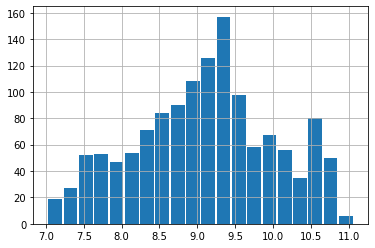

In [9]:
#normalize the feature 'charges' using log

df['charges']=np.log(df['charges'])
plt.figure()
df['charges'].hist(rwidth=0.9,bins=20)


In [10]:
#first to avoid dummy variable trap using get_dummies
#only for categorical columns- sex,smoker,region
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


In [12]:
Y= df[['charges']]
X= df.drop(['charges'],axis=1)
#split dataset into 80-20 format
#create 80% size
sz=0.8*len(X)
sz=int(sz)
#create train and test
X_train=X.values[0:sz]
X_test=X.values[sz:len(X)]

Y_train=Y.values[0:sz]
Y_test=Y.values[sz:len(Y)]


In [13]:
#fit and score the model
#linera regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.7749648763177934
0.7361484274140662


In [14]:
#generate Y_predictions
Y_pred=lr.predict(X_test)

In [15]:
#root mean squared error
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

0.4646664932548071

In [16]:
#root mean squared logarithmic error
Y_test_e=[]
Y_pred_e=[]

#convert float values to int
for i in range (0,len(Y_test)):
  Y_test_e.append(math.exp(Y_test[i]))
  Y_pred_e.append(math.exp(Y_pred[i]))
log_sq_sum=0
for i in range (0,len(Y_test)):
  log_a=math.log(Y_test_e[i]+1)      #for actual values
  log_p=math.log(Y_pred_e[i]+1)      #for predicted values
  log_diff=(log_p - log_a)**2
  log_sq_sum=log_sq_sum + log_diff

rmsle=math.sqrt((log_sq_sum/len(Y_test)))
rmsle

0.4646014129578276